In [1]:
from dbn import DeepBeliefNet
from rbm import RestrictedBoltzmannMachine
from util import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

### Load data

In [2]:
image_size = [28, 28]
train_images, train_labels, test_images, test_labels = read_mnist()

## Analysis

### 4.2.2 

Reconstruction losses for all RBMs in the stack

In [3]:
DBN = DeepBeliefNet(sizes={"vis": image_size[0] * image_size[1], "hid": 500, "pen": 500, "top": 2000, "lbl": 10},
                    image_size=image_size,
                    n_labels=10,
                    batch_size=20
                    )

DBN.train_greedylayerwise(train_images, train_labels, n_iterations=1000)
DBN.rbm_stack

training vis--hid
learning CD1
iteration=      0 recon_loss=0.0648
iteration=     10 recon_loss=0.0348
training hid--pen
learning CD1
iteration=      0 recon_loss=0.2519
iteration=     10 recon_loss=0.1379
training pen+lbl--top
learning CD1
iteration=      0 recon_loss=0.2713
iteration=     10 recon_loss=0.0512


{'vis--hid': <rbm.RestrictedBoltzmannMachine at 0x7fdaf8428550>,
 'hid--pen': <rbm.RestrictedBoltzmannMachine at 0x7fdb085f8e80>,
 'pen+lbl--top': <rbm.RestrictedBoltzmannMachine at 0x7fdb293d1310>}

Plot reconstruction losses for all RBMs in the stack

ValueError: x and y must have same first dimension, but have shapes (20,) and (2,)

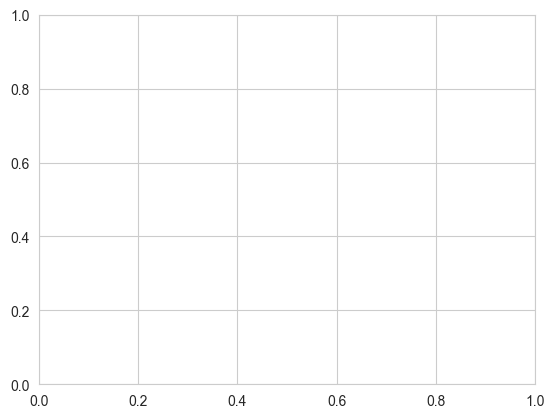

In [4]:
# iterations = range(20)
# plt.plot(iterations, DBN.rbm_stack['vis--hid'].losses, label='vis--hid')
# plt.plot(iterations, DBN.rbm_stack['hid--pen'].losses, label='hid--pen')
# plt.plot(iterations, DBN.rbm_stack['pen+lbl--top'].losses, label='pen+lbl--top')

# plt.xlabel('Iterations')
# plt.ylabel('Reconstruction Loss')
# plt.legend()
# plt.show()

### 4.2.2

Image recognition

In [5]:
DBN.recognize(test_images, test_labels)

accuracy = 11.00%


In [6]:
DBN.recognize(train_images, train_labels)

accuracy = 10.04%
